<a href="https://colab.research.google.com/github/Maks12435/ML-projects/blob/main/Cartoon_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
yeji = load_img('/content/Ernar.jpg')
type(yeji)

PIL.JpegImagePlugin.JpegImageFile

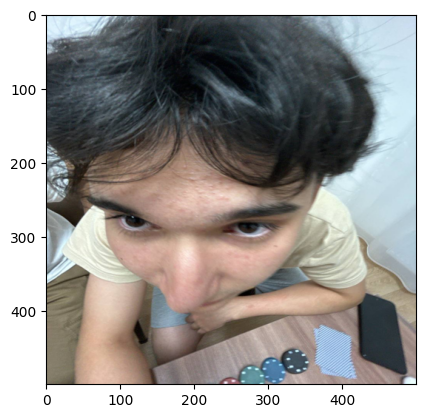

In [ ]:
yeji = yeji.resize((500, 500))
plt.imshow(yeji)

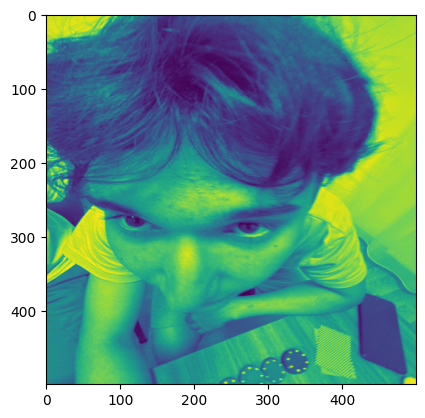

In [ ]:
yeji_arr = np.array(yeji)
yeji_arr = np.mean(yeji_arr, axis=2)
plt.imshow(yeji_arr)

In [ ]:
yeji_arr

array([[231.        , 229.        , 228.        , ..., 220.66666667,
        219.66666667, 218.66666667],
       [231.33333333, 229.33333333, 228.33333333, ..., 220.66666667,
        219.66666667, 218.66666667],
       [231.33333333, 229.33333333, 228.33333333, ..., 220.66666667,
        219.66666667, 218.66666667],
       ...,
       [115.66666667, 115.66666667, 118.66666667, ..., 249.33333333,
        248.        , 246.        ],
       [118.        , 112.        , 114.        , ..., 249.        ,
        247.66666667, 245.66666667],
       [115.        , 113.33333333, 113.66666667, ..., 248.66666667,
        247.33333333, 245.33333333]])

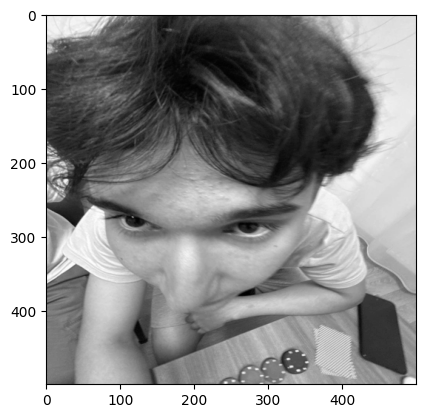

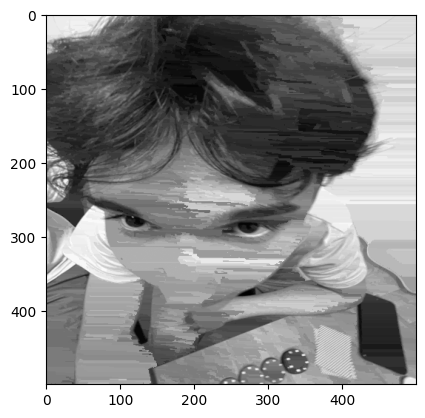

In [ ]:
plt.imshow(yeji_arr, cmap='gray')
plt.show()

smoothed_arr = np.copy(yeji_arr)
n = 6.0

for i in range(yeji_arr.shape[0] - 1):
    for j in range(yeji_arr.shape[1] - 1):
        if abs(yeji_arr[i, j] - yeji_arr[i, j + 1]) <= n  and abs(yeji_arr[i, j] - yeji_arr[i+1, j]) <= n and abs(yeji_arr[i, j] - yeji_arr[i+1, j+1]) <= n:

            smoothed_arr[i, j + 1] = smoothed_arr[i, j]
            smoothed_arr[i + 1, j] = smoothed_arr[i, j]
            smoothed_arr[i + 1, j+1] = smoothed_arr[i, j]


plt.imshow(smoothed_arr, cmap='gray')
plt.show()

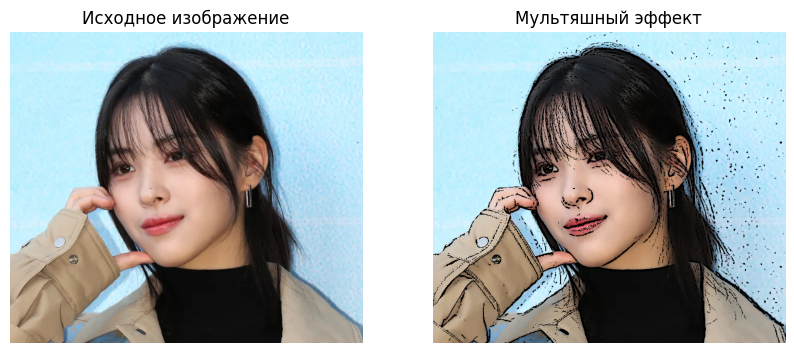

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/Ryujin.jpg')
color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 8)
cartoon = cv2.bitwise_and(color, color, mask=edges)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.imshow(color)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Мультяшный эффект')
plt.imshow(cartoon)
plt.axis('off')

plt.show()

In [ ]:
def edges_founder(img, max_value, kernel_size, c):
  if kernel_size // 2 == 0:
    return  ("kernel size must be odd number")

  height, width = img.shape

  threashold_img = np.zeros_like(img)

  radius = kernel_size // 2

  for i in range(radius, height - radius):
    for j in range(radius, width - radius):

      local_matrix = img[i - radius:i + radius+1, j - radius:j  +radius + 1]
      local_mean = np.mean(local_matrix)
      threashold = local_mean - c

      if img[i, j] > threashold:
        threashold_img[i, j] = max_value
      else:
        threashold_img[i, j] = 0

  return threashold_img


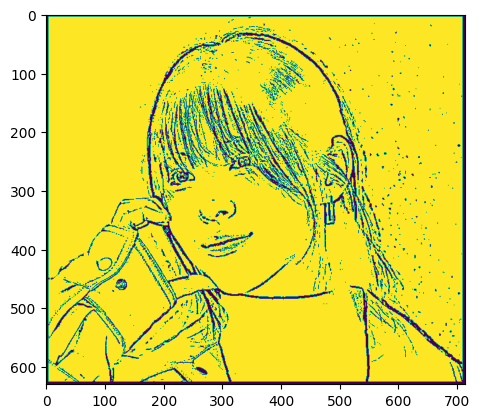

In [ ]:
edge = edges_founder(gray, 255, 9, 8)
plt.imshow(edge)

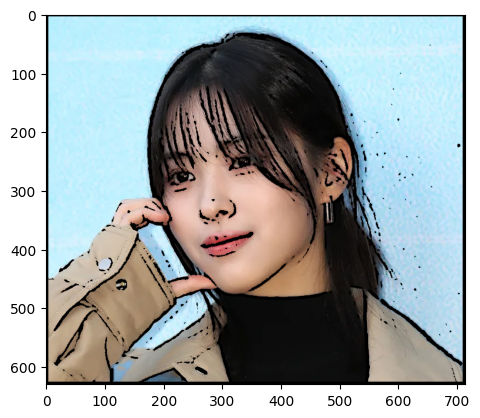

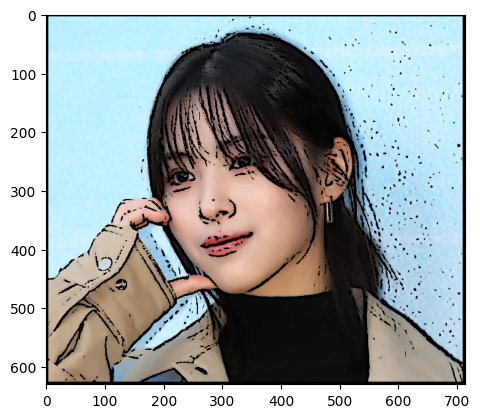

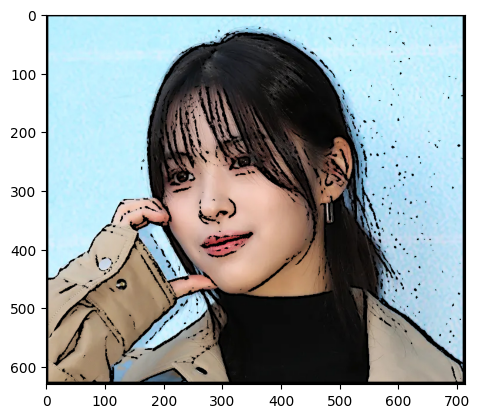

In [ ]:
edges1 = edges_founder(smoothed_img, 255, 9, 5)
final1 = cv2.bitwise_and(color, color, mask=edges1)
plt.imshow(final1)
plt.show()
edges2 = edges_founder(bil_img, 255, 9, 5)
final2 = cv2.bitwise_and(color, color, mask=edges2)
plt.imshow(final2)
plt.show()
edges3 = edges_founder(median_img, 255, 9, 5)
final3 = cv2.bitwise_and(color, color, mask=edges3)
plt.imshow(final3)
plt.show()

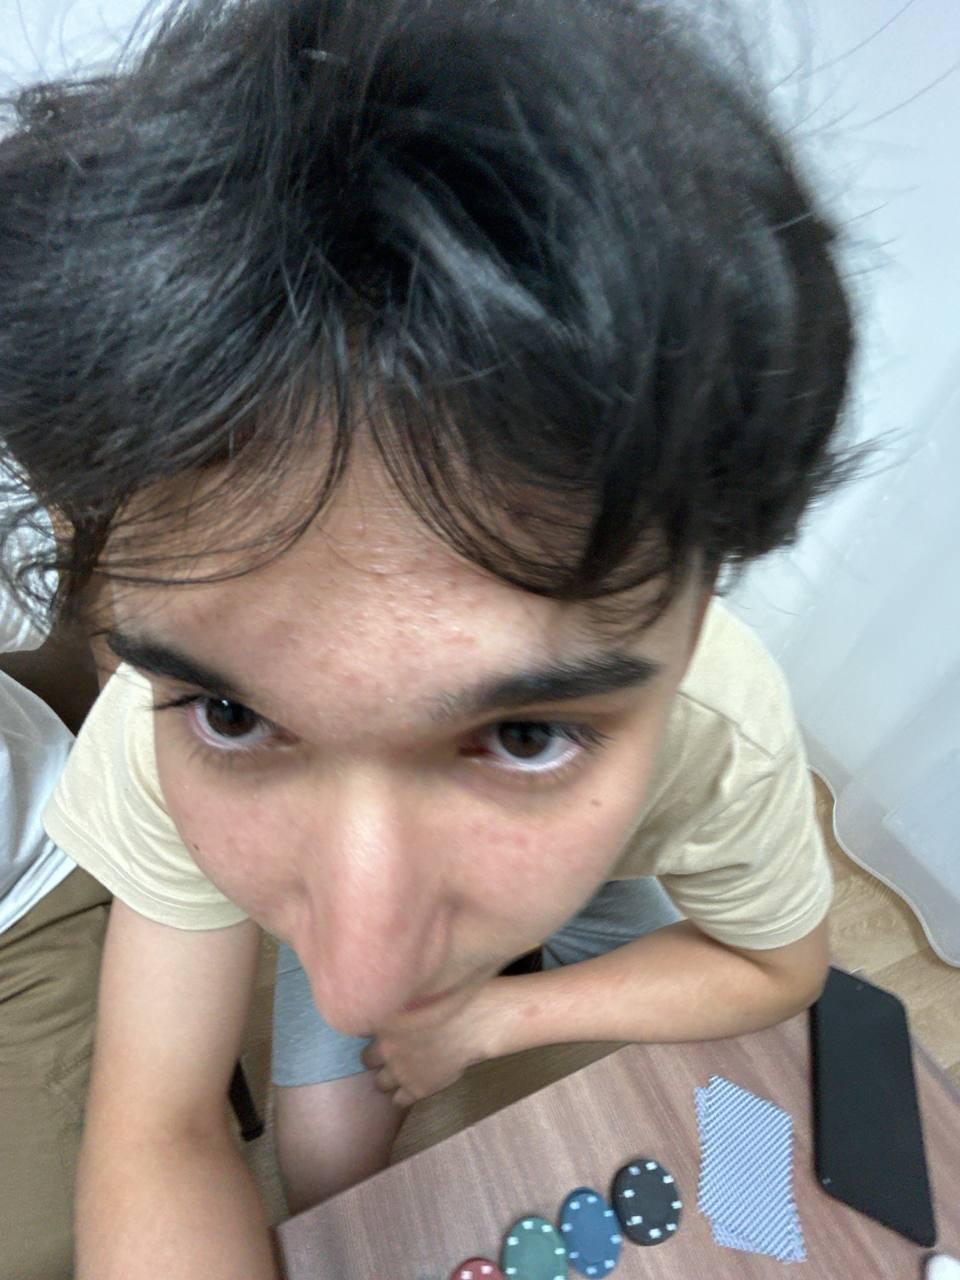

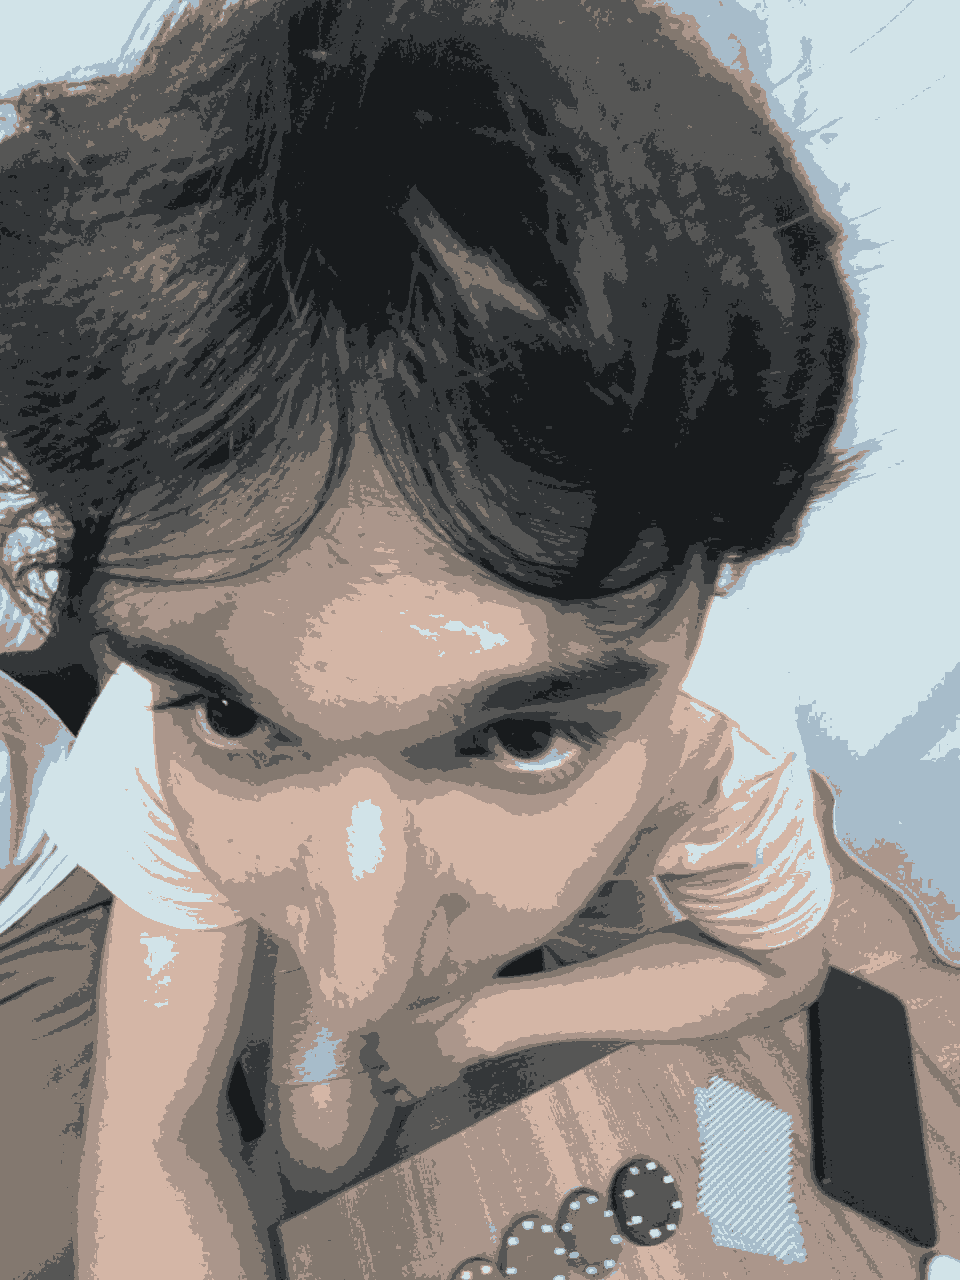

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def cartoonize_image(image_path):
    img = cv2.imread(image_path)

    def reduce_colors(img, k=8):
        data = img.reshape((-1, 3))
        data = np.float32(data)

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        _, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        centers = np.uint8(centers)
        result = centers[labels.flatten()]
        return result.reshape(img.shape)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 5)

    edges = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    color = reduce_colors(img, k=8)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    cv2_imshow(img)
    cv2_imshow(color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_path = "/content/Ernar.jpg"
cartoonize_image(image_path)

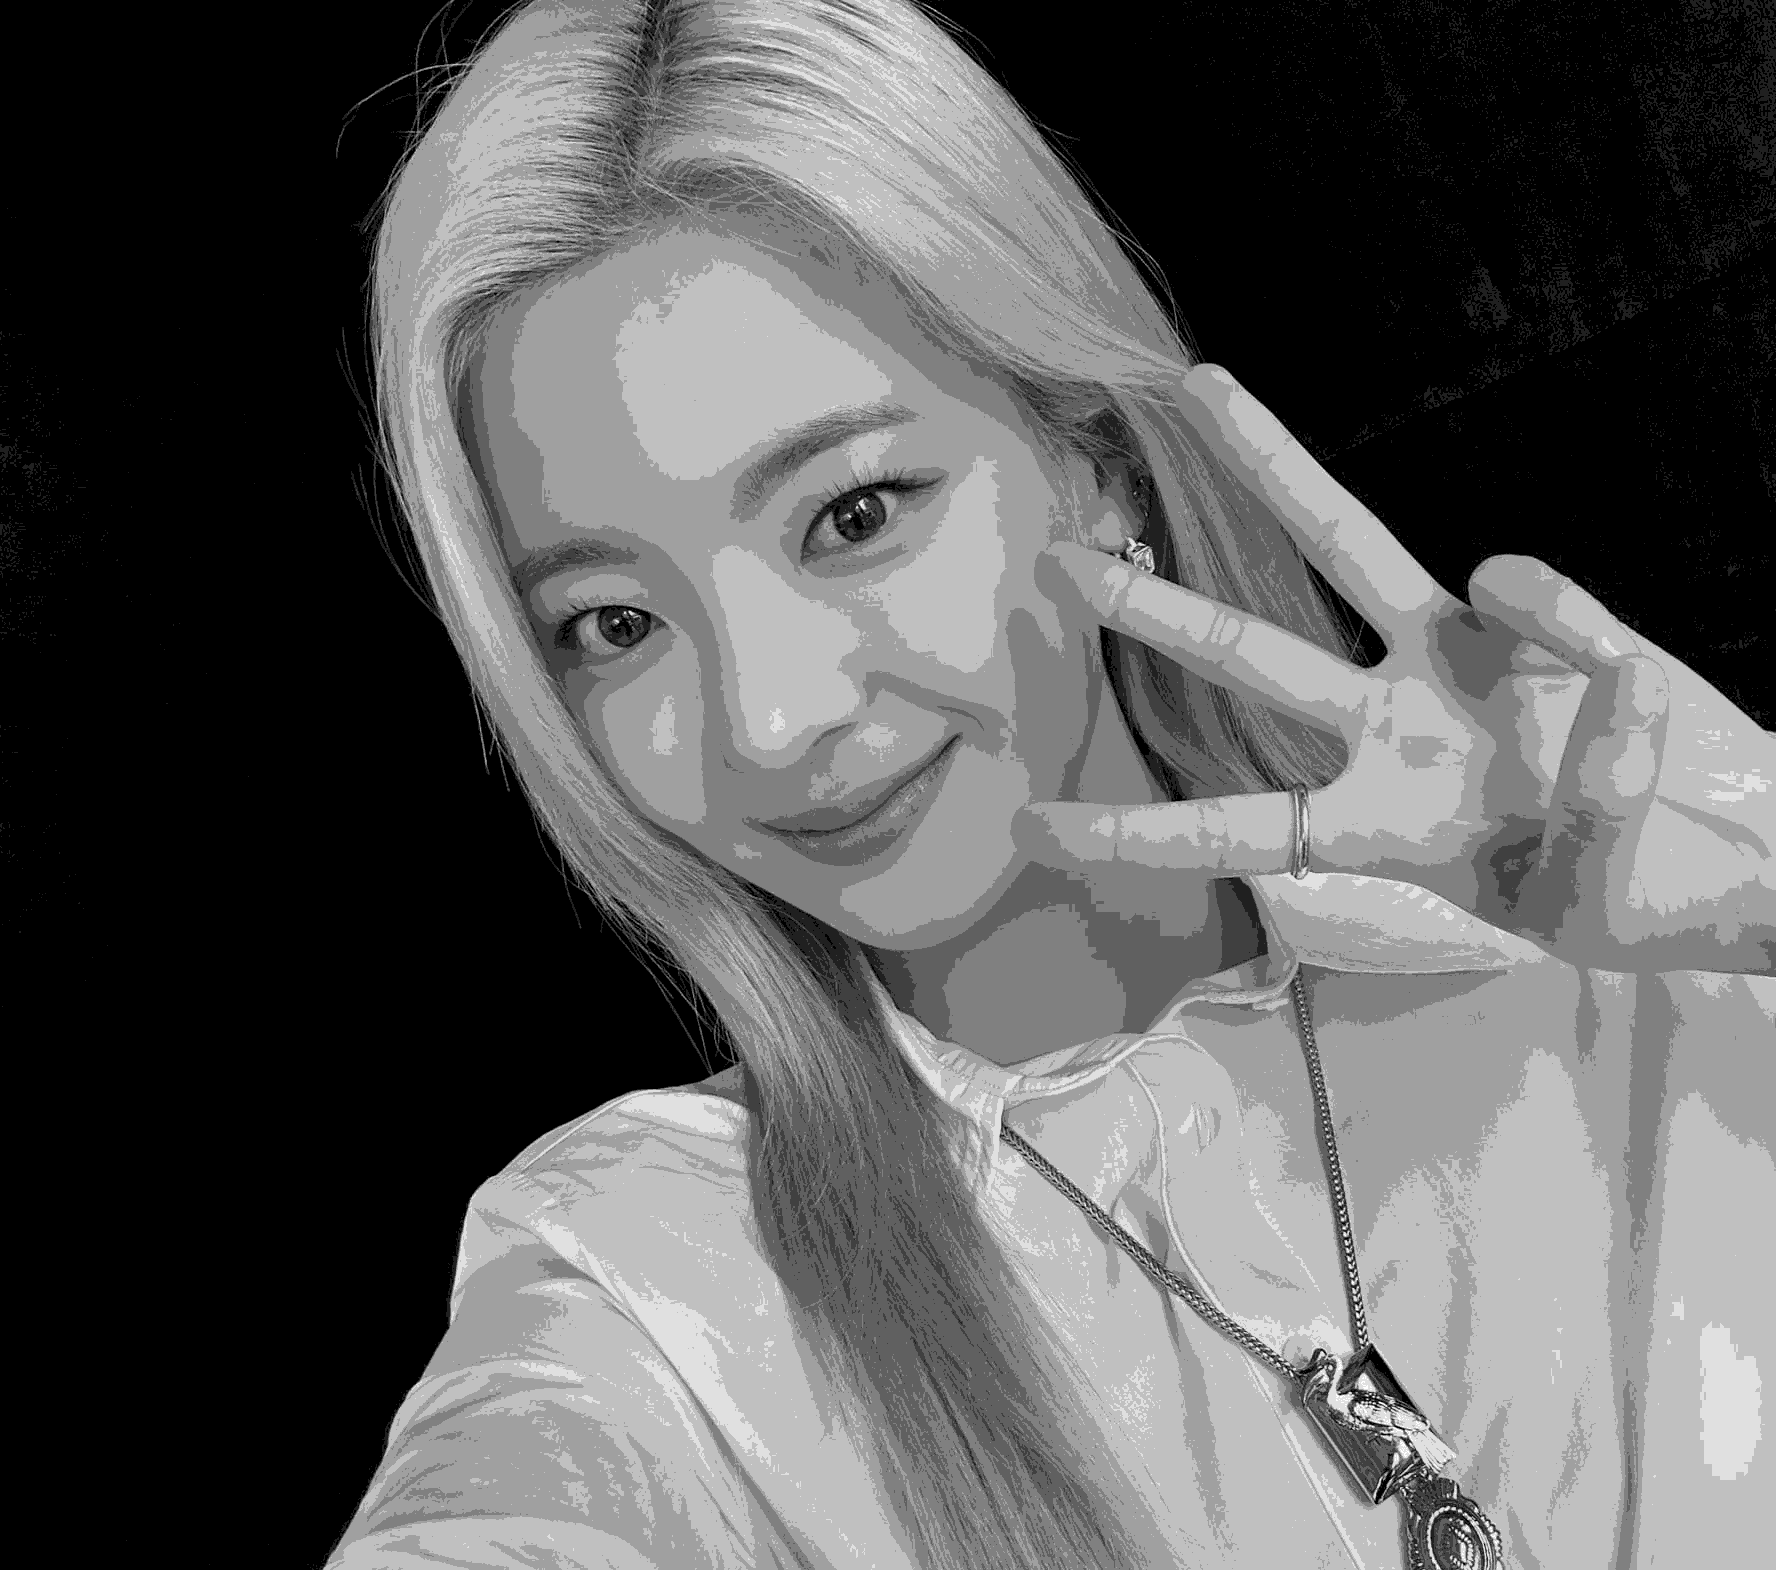

In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Определяем уровни квантования
levels = np.array([0, 32, 64, 96, 128, 160, 192, 224, 255])

# Используем функцию digitize для квантования
img_quantized = np.digitize(img, bins=levels) - 1
img_quantized = levels[img_quantized]

# Convert the data type to uint8 before color conversion
img_quantized = img_quantized.astype(np.uint8) # This line is added

# Преобразуем обратно в цветное изображение
img_quantized = cv2.cvtColor(img_quantized, cv2.COLOR_GRAY2RGB)

# Отображение результата
cv2_imshow(img_quantized)

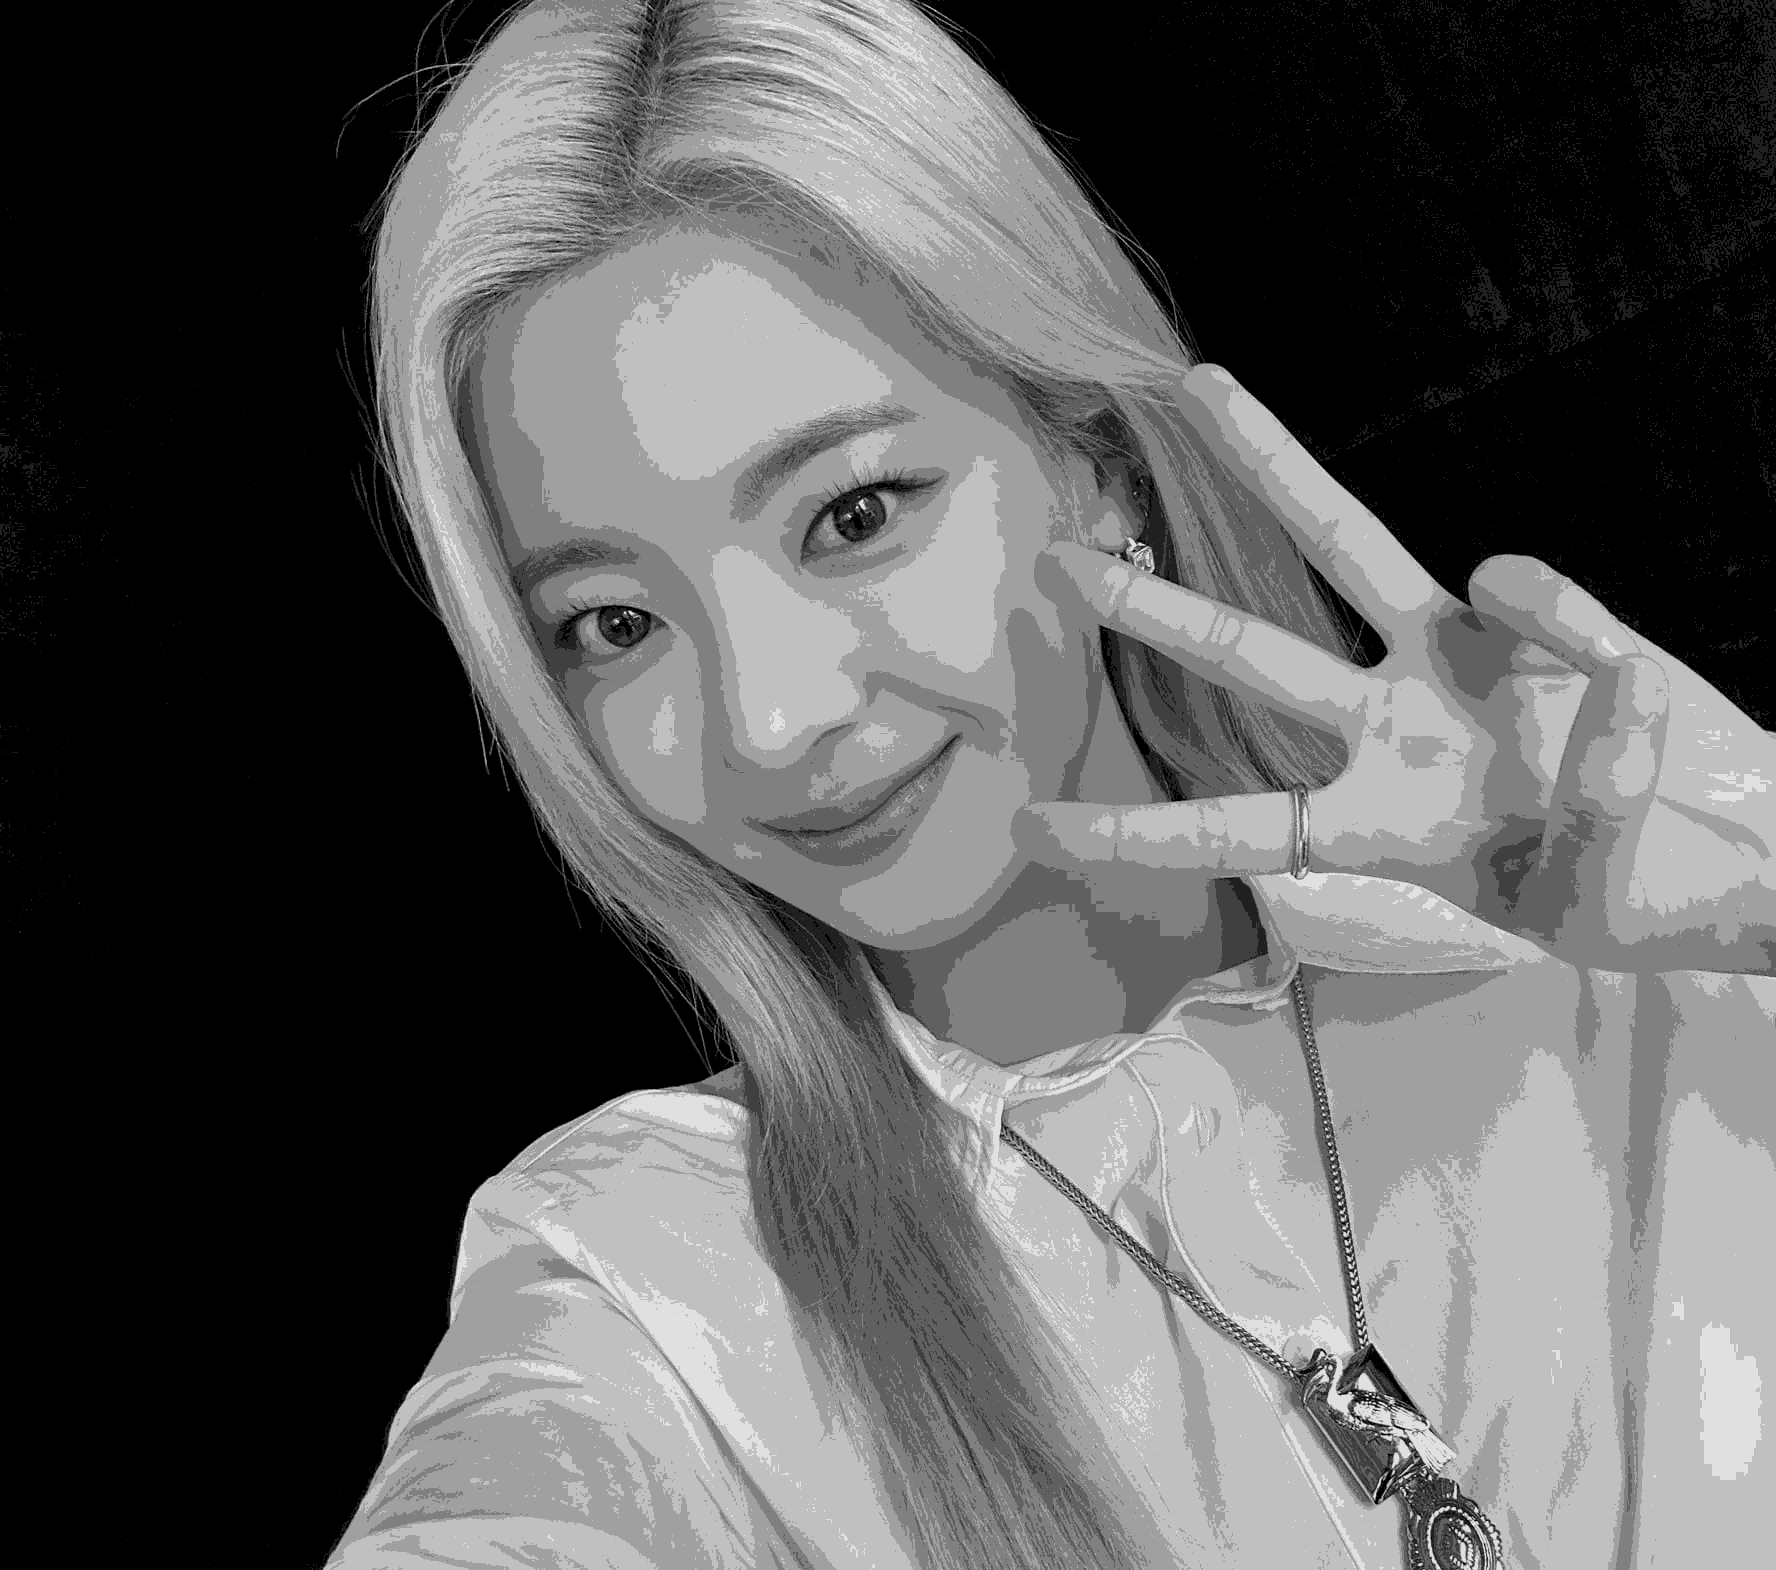